In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpmath import whitw
from scipy.integrate import solve_ivp
from scipy.integrate import odeint
from scipy.integrate import quad
import pandas as pd
import math
from scipy.interpolate import CubicSpline
from scipy.optimize import fsolve
from timer import Timer
import os

In [18]:


def EoM(x):
    if (x<1):
        dxdt = 0.1
    else:
        dxdt = 0.
    return dxdt

f = lambda t,x: EoM(x)

x0 = 0.

sol = solve_ivp(f, [1,10], [x0], method="RK45")

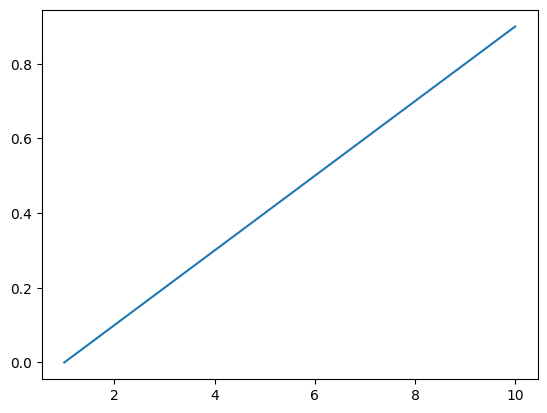

In [19]:
plt.plot(sol.t, sol.y[0,:])

In [1]:
def EndOfInflation(t, a, H, tol=1e-6):
    N = np.log(a)
    n = int(len(t)/10)
    
    """d2Ndt2 = (N[2:]/(t[2:]-t[1:-1]) 
              - N[1:-1]*(t[2:]-t[:-2])/((t[2:]-t[1:-1])*(t[1:-1]-t[:-2]))
              + N[:-2]/(t[1:-1]-t[:-2]) 
             )/(t[1:-1]-t[:-2])
    
    f = CubicSpline(N[n:-2], d2Ndt2[n:] + H[n:-2]**2)"""
    
    dHdt = (H[1:] - H[:-1])/(t[1:]-t[:-1])
    
    f = CubicSpline(N[n:-1], dHdt[n:] + H[n:-1]**2)
    
    delN = 1.
    RefineGrid = True
    r0 = 40.
    while RefineGrid:
        print(delN)
        x0 = np.arange(50, max(N[:-2]), delN)
        res = fsolve(f, x0, xtol=tol)
        N0 = res[0]
        print(res[0])
        fN0 = abs(f(N0))
        for r in res:
            fN1 = abs(f(r))
            if fN1 < fN0:
                fN0 = fN1
                N0 = r
        r1 = np.round(N0, 2)
        print(r1)
        if r1 == r0:
            RefineGrid=False
        else:
            r0 = r1
            delN = delN*0.5
            
    return N0, delN

In [108]:
file = "GEF_Beta25_M6_16_SE.dat"
input_df = pd.read_table(file, sep=",")
data = input_df.values
print(data.shape)
tR = data[:,1]
aR = data[:,2]
lnkhR = data[:,3]
dphidtR = data[:,4]
HR = data[:,5]
ER = data[:,6]
BR = data[:,7]
GR = data[:,8]

(2525, 11)


In [85]:
print(np.log(aR[int(len(tR)/10)]))

5.218896002380036


In [86]:
N0, delN = EndOfInflation(tR, aR, HR, tol=1e-4)

1.0
52.28560193136452
62.03
0.5
52.28560193136452
61.97
0.25
52.28560193136452
3866.44
0.125
52.28560193136452
62.07
0.0625
52.28560193136452
62.04
0.03125
52.285601931364525
62.07
0.015625
52.28560193136452
62.07


In [80]:
print(N0)

62.06908529481128


In [109]:
aR = np.log(aR)

In [110]:
print(aR[-1])

62.036049499141434


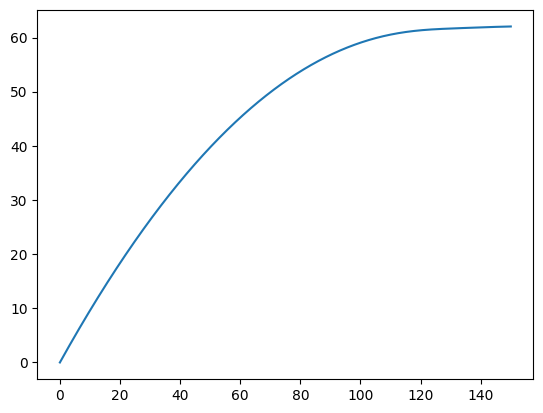

In [111]:
plt.plot(tR, aR)

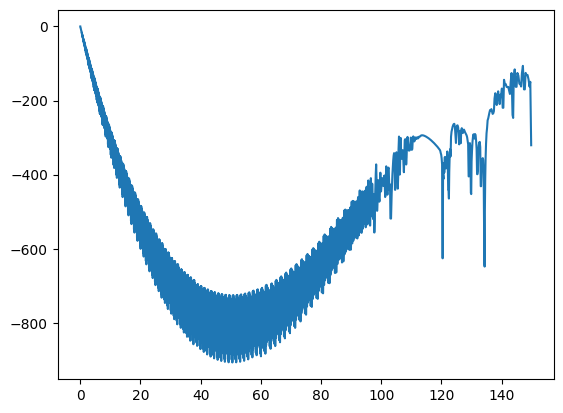

In [112]:
dadt = aR[1:]-aR[:-1]/(tR[1:]-tR[:-1])
plt.plot(tR[:-1], dadt)
#plt.yscale("symlog")
plt.show()

In [113]:
d2adt2 = (aR[2:]/(tR[2:]-tR[1:-1]) 
          - aR[1:-1]*(tR[2:]-tR[:-2])/((tR[2:]-tR[1:-1])*(tR[1:-1]-tR[:-2])) 
          + aR[:-2]/(tR[1:-1]-tR[:-2])
         )/(tR[1:-1]-tR[:-2])

dHdt = (HR[1:] - HR[:-1])/(tR[1:]-tR[:-1])

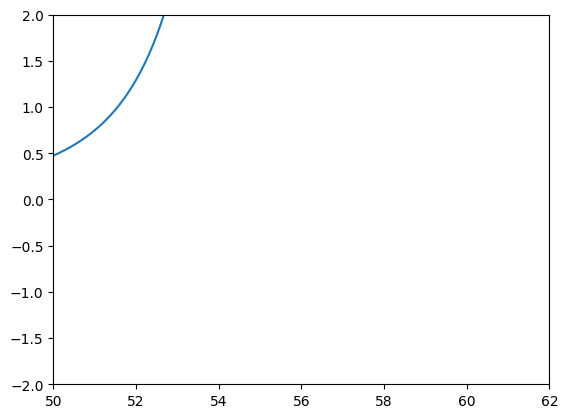

In [115]:
#plt.plot(aR[:-2], d2adt2)
plt.plot(aR[:-1], -dHdt/HR[:-1]**2)
#plt.plot(aR[:-1], dHdt, "g:")
#plt.vlines(res[0], -0.01, 0.001)
#plt.yscale("symlog")
plt.ylim(-2,2)
plt.xlim(50,62)
plt.show()

In [65]:
print(aR[2000])

53.15581571378398


In [66]:
for i in range(47,len(aR)):
    print(aR[i])
    if ((aR[i]-aR[i-1])/(aR[i]) < 0):
        print(aR[i], i)

2.2204460492503128e-16
1.9984014443252798e-15
1.976196983832759e-14
1.9850787680295827e-13
1.9824142327687146e-12
1.9823920282905376e-11
1.9824208939123277e-10
1.982419115786995e-09
1.9824192313288206e-08
1.9824192010288826e-07
1.982419187352487e-06
1.9824190415495067e-05
0.00019824175828096996
0.001982402995530251
0.009168931130893466
0.01822916916794544
0.02932013048915229
0.04284041670505026
0.059663885049587695
0.08119420696737757
0.10954485481310441
0.14691899166111486
0.17674890326827886
0.20657146388526848
0.23676449702022942
0.2651597829529807
0.29160216360008323
0.31803831694617923
0.34629529084565613
0.3759164129471482
0.4043682416355591
0.43028607177167943
0.45516060780757717
0.4815773788757932
0.5104776981067234
0.5397627921691073
0.5666928456601736
0.591482898174932
0.6168143947342766
0.6448860881395567
0.6748477434883153
0.7003157155476549
0.7257782893534376
0.7538613413155082
0.7837891869021061
0.809438125313304
0.8350815790654394
0.8631985907536841
0.8930365401883107
0.

In [67]:
d2lnadt2 = CubicSpline(aR[50:-2], d2adt2[50:])
H2 = CubicSpline(aR[50:], HR[50:]**2)
f = lambda x: d2lnadt2(x) + H2(x)

res = fsolve(f, 61.5, xtol=1e-9)


/home/users/rfreiher/.conda/envs/ptarcade/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [68]:
print(res)
print(f(res[0]))
print(f(res[0]-0.1))
print(f(res[0]+0.1))

[61.74985899]
-5.304608352371924e-06
-0.0007517895738205967
-0.0004805794732308095


In [4]:
import numpy as np
a = np.array([[i+j for i in range(1,4)] for j in range(5)])

In [6]:
print(a)
print(a.shape)

[[1 2 3]
 [2 3 4]
 [3 4 5]
 [4 5 6]
 [5 6 7]]
(5, 3)


In [11]:
x = 0.
sgnsort = int((1-np.sign(x))/2)
print(sgnsort)
print(1-sgnsort)

0
1


In [13]:
for i in range(3):
    print(type(i))

<class 'int'>
<class 'int'>
<class 'int'>
